### 1. Importar las bibliotecas requeridas

In [1]:
import pandas as pd
%matplotlib inline

### 2. Importar la bd preprocesada y lista df1

In [2]:
df = pd.read_csv('bd titanic mineros.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               891 non-null    int64  
 1   Sobrevivió       891 non-null    int64  
 2   Clase            891 non-null    int64  
 3   Sexo             891 non-null    object 
 4   Edad             714 non-null    float64
 5   HerEsp           891 non-null    int64  
 6   PadHij           891 non-null    int64  
 7   Precio           891 non-null    float64
 8   Embarcó          891 non-null    object 
 9   GruposEdad       714 non-null    object 
 10  HerEsp + PadHij  891 non-null    int64  
 11  SolAcom          891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [4]:
df.head(3)

,Id,Sobrevivió,Clase,Sexo,Edad,HerEsp,PadHij,Precio,Embarcó,GruposEdad,HerEsp + PadHij,SolAcom
0,1,0,3,male,22.0,1,0,7.2500,S,Adulto jóven,1,Acompañado
1,2,1,1,female,38.0,1,0,71.2833,C,Adulto,1,Acompañado
2,3,1,3,female,26.0,0,0,7.9250,S,Adulto jóven,0,Solo


### 3. Importar la bd preprocesada y lista df2

In [5]:
df2 = pd.read_csv('bd titanic mineros -19.csv', encoding='latin-1')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               139 non-null    int64  
 1   Sobrevivió       139 non-null    int64  
 2   Clase            139 non-null    int64  
 3   Sexo             139 non-null    object 
 4   Edad             139 non-null    float64
 5   HerEsp           139 non-null    int64  
 6   PadHij           139 non-null    int64  
 7   Precio           139 non-null    float64
 8   Embarcó          139 non-null    object 
 9   GruposEdad       139 non-null    object 
 10  HerEsp + PadHij  139 non-null    int64  
 11  SolAcom          139 non-null    object 
 12  GruposHerEsp     139 non-null    object 
 13  GruposPadHij     139 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 15.3+ KB


In [7]:
df2.head(3)

,Id,Sobrevivió,Clase,Sexo,Edad,HerEsp,PadHij,Precio,Embarcó,GruposEdad,HerEsp + PadHij,SolAcom,GruposHerEsp,GruposPadHij
0,8,0,3,male,2.0,3,1,21.0750,S,Niño,4,Acompañado,Más de 2,Con 1-2 padres
1,10,1,2,female,14.0,1,0,30.0708,C,Adolescente,1,Acompañado,Entre 1-2,Sin padres
2,11,1,3,female,4.0,1,1,16.7000,S,Niño,2,Acompañado,Entre 1-2,Con 1-2 padres


### 4. Análisis global

In [8]:
print(len(df))

891


In [9]:
df['Sobrevivió'].value_counts(normalize=False)

0    549
1    342
Name: Sobrevivió, dtype: int64

In [10]:
df['Sobrevivió'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Sobrevivió, dtype: float64

In [11]:
round(df['Sobrevivió'].value_counts(normalize=True), 2)

0    0.62
1    0.38
Name: Sobrevivió, dtype: float64

In [12]:
sobrevivió_datos = round(df['Sobrevivió'].value_counts(normalize=True), 2)

In [13]:
sobrevivió_datos

0    0.62
1    0.38
Name: Sobrevivió, dtype: float64

#### Para un gráfico de porcentaje de sobrevivencia en general.

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.style.use('dark_background')

<AxesSubplot:title={'center':'SOBREVIVIÓ'}>

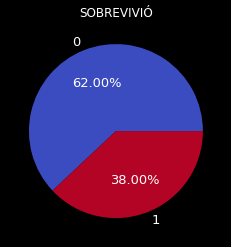

In [16]:
sobrevivió_datos.plot(kind='pie', figsize=(4,4), title='SOBREVIVIÓ', label='', 
                      colormap='coolwarm', autopct='%.2f%%', fontsize=13)

#### Análisis con otras variables o características de nuestro df.

In [17]:
print(df['GruposEdad'].value_counts(normalize=True))

Adulto          0.358543
Adulto jóven    0.343137
Adulto mayor    0.103641
Niño            0.099440
Adolescente     0.095238
Name: GruposEdad, dtype: float64


In [18]:
print(df['Sexo'].value_counts(normalize=True))

male      0.647587
female    0.352413
Name: Sexo, dtype: float64


In [19]:
print(df['Clase'].value_counts(normalize=True))

3    0.551066
1    0.242424
2    0.206510
Name: Clase, dtype: float64


In [20]:
print(df['SolAcom'].value_counts(normalize=True))

Solo          0.602694
Acompañado    0.397306
Name: SolAcom, dtype: float64


In [21]:
# análisis de cuántos menores a 18 años iban solos o acompañados.
print(df2['SolAcom'].value_counts(normalize=True))

Acompañado    0.741007
Solo          0.258993
Name: SolAcom, dtype: float64


### 5. Análisis específico dos variables

In [22]:
pd.crosstab(index=df.Sobrevivió, columns=df.Sexo, normalize=True)

Sexo,female,male
Sobrevivió,,
0,0.090909,0.525253
1,0.261504,0.122334


#### Para un gráfico de porcentaje de sobrevivencia de mujeres más hombres.

In [23]:
sobrevivió_sexo_datos = pd.crosstab(index=df.Sobrevivió, columns=df.Sexo, normalize=True)

In [24]:
# el total de los datos de la tabla o del gráfico deben ser igual a 100%.
sobrevivió_sexo_datos

Sexo,female,male
Sobrevivió,,
0,0.090909,0.525253
1,0.261504,0.122334


<AxesSubplot:title={'center':'SOBREVIVIÓ POR SEXO'}, xlabel='Sobrevivió'>

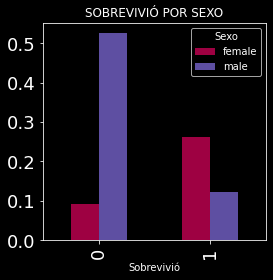

In [25]:
sobrevivió_sexo_datos.plot(kind='bar', figsize=(4,4), title='SOBREVIVIÓ POR SEXO', colormap='Spectral', fontsize=18)

#### Para un gráfico de porcentaje de sobrevivencia de únicamente mujeres.

In [26]:
mujer = df[df['Sexo']=='female']

In [27]:
mujer_sobrevivió = pd.crosstab(index=mujer.Sobrevivió, columns=mujer.Sexo, 
                               normalize='columns')

In [28]:
mujer_sobrevivió 

Sexo,female
Sobrevivió,
0,0.257962
1,0.742038


In [29]:
plt.style.use('classic')

<AxesSubplot:title={'center':'MUJERES SOBREVIVEN'}, xlabel='Sobrevivió'>

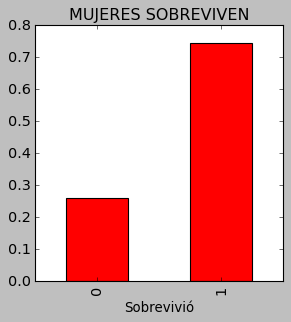

In [30]:
mujer_sobrevivió.plot(kind='bar', figsize=(4,4), title='MUJERES SOBREVIVEN', 
                      colormap='autumn', fontsize=13, legend='')

#### Para un gráfico de porcentaje de sobrevivencia de únicamente hombres.

In [31]:
hombre = df[df['Sexo']=='male']

In [32]:
hombre_sobrevivió = pd.crosstab(index=hombre.Sobrevivió, columns=hombre.Sexo, 
                                normalize='columns')

<AxesSubplot:title={'center':'HOMBRES SOBREVIVEN'}, xlabel='Sobrevivió'>

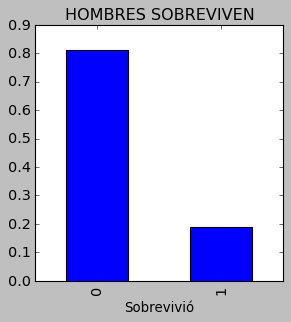

In [33]:
hombre_sobrevivió.plot(kind='bar', figsize=(4,4), title='HOMBRES SOBREVIVEN', 
                       colormap='winter', fontsize=13, legend='')

#### Análisis con dos variables con df1.

In [34]:
pd.crosstab(index=df['Sobrevivió'], columns=df['Sexo'], normalize ='columns')

Sexo,female,male
Sobrevivió,,
0,0.257962,0.811092
1,0.742038,0.188908


In [35]:
pd.crosstab(index=df.Sobrevivió, columns=df.Clase, normalize ='columns')

Clase,1,2,3
Sobrevivió,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [36]:
pd.crosstab(index=df.Sobrevivió, columns=df.GruposEdad, normalize ='columns')

GruposEdad,Adolescente,Adulto,Adulto jóven,Adulto mayor,Niño
Sobrevivió,,,,,
0,0.588235,0.582031,0.64898,0.635135,0.408451
1,0.411765,0.417969,0.35102,0.364865,0.591549


In [37]:
pd.crosstab(df.Sobrevivió, df.SolAcom, normalize ='columns')

SolAcom,Acompañado,Solo
Sobrevivió,,
0,0.49435,0.696462
1,0.50565,0.303538


#### Análisis con dos variables con df2.

In [38]:
# ¡wow! Viajar con 1 o 2 padres mejoró la probabilidad de sobrevivir de los niños.
pd.crosstab(df2.Sobrevivió, df2.GruposPadHij, normalize ='columns')

GruposPadHij,Con 1-2 padres,Sin padres
Sobrevivió,,
0,0.438202,0.6
1,0.561798,0.4


In [39]:
pd.crosstab(df2.Sobrevivió, df2.GruposHerEsp, normalize ='columns')

GruposHerEsp,Entre 1-2,Más de 2,Sin hermanos
Sobrevivió,,,
0,0.333333,0.9,0.42623
1,0.666667,0.1,0.57377


In [40]:
# ¡interesante! Viajar acompañado mejoró la probabilidad de sobrevivir de los niños.
pd.crosstab(df2.Sobrevivió, df2.SolAcom, normalize ='columns')

SolAcom,Acompañado,Solo
Sobrevivió,,
0,0.446602,0.638889
1,0.553398,0.361111


### 6. Análisis específico tres variables

In [41]:
pd.crosstab(index=df.Sobrevivió, columns=[df.Sexo, df.Clase], normalize='columns')

Sexo          female                     male                    
Clase              1         2    3         1         2         3
Sobrevivió                                                       
0           0.031915  0.078947  0.5  0.631148  0.842593  0.864553
1           0.968085  0.921053  0.5  0.368852  0.157407  0.135447

#### Para un gráfico de porcentaje de sobrevivencia de mujeres por clase.

In [42]:
mujer_sobrevivió_clase = pd.crosstab(index=mujer.Clase, columns=mujer.Sobrevivió, 
                                     normalize='index')

In [43]:
mujer_sobrevivió_clase

Sobrevivió,0,1
Clase,,
1,0.031915,0.968085
2,0.078947,0.921053
3,0.500000,0.500000


In [44]:
plt.style.use('fivethirtyeight')

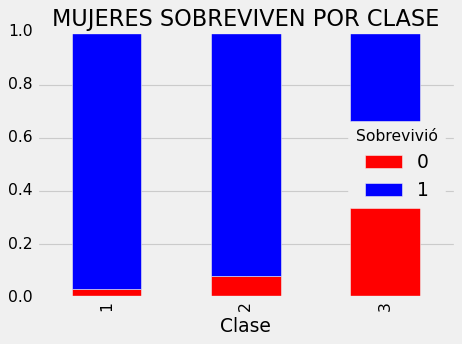

In [45]:
mujer_sobrevivió_clase.plot(kind='bar', figsize=(6,4), title='MUJERES SOBREVIVEN POR CLASE', 
                            colormap='bwr_r', stacked=True).legend(loc=5, title='Sobrevivió')

#### Para un gráfico de porcentaje de sobrevivencia de hombres por clase.

In [46]:
hombre_sobrevivió_clase = pd.crosstab(index=hombre.Clase, columns=hombre.Sobrevivió, 
                                      normalize='index')

In [47]:
hombre_sobrevivió_clase

Sobrevivió,0,1
Clase,,
1,0.631148,0.368852
2,0.842593,0.157407
3,0.864553,0.135447


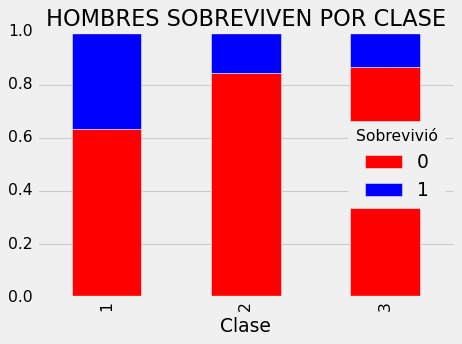

In [48]:
hombre_sobrevivió_clase.plot(kind='bar', figsize=(6,4), title='HOMBRES SOBREVIVEN POR CLASE', 
                             colormap='bwr_r', stacked=True).legend(loc=5, title='Sobrevivió')

### 7. Análisis específico tarifas y vida

In [49]:
# calcular el precio promedio del ticket por clase.
df3 = df.groupby('Clase').Precio.mean()
df3

Clase
1    84.154687
2    20.662183
3    13.675550
Name: Precio, dtype: float64

In [50]:
# calcular la diferencia entre los precios promedios.
segunda_a_primera = round(df3.iloc[0] - df3.iloc[1],0)
tercera_a_segunda = round(df3.iloc[1] - df3.iloc[2],0)
tercera_a_primera = round(df3.iloc[0] - df3.iloc[2],0)
print(segunda_a_primera)
print(tercera_a_segunda)
print(tercera_a_primera)

63.0
7.0
70.0


In [51]:
# porcentajes de sobrevivencia por clase.
sobrevivió_clase_datos = round(pd.crosstab(index=df.Sobrevivió, columns=df.Clase, 
                                           normalize ='columns'), 2)
sobrevivió_clase_datos.loc[1]

Clase
1    0.63
2    0.47
3    0.24
Name: 1, dtype: float64

In [52]:
print('¡RESUMEN DE ANÁLISIS TARIFA Y VIDA!')
print('\n')
print('Diferencia a pagar para ir de 2da a 1ra clase: £{}, y aumentar la prob. de sobrevivir de 0.47 a 0.63'.format(segunda_a_primera))
print('Diferencia a pagar para ir de 3ra a 2da clase: £{}, y aumentar la prob. de sobrevivir de 0.24 a 0.47'.format(tercera_a_segunda))
print('Diferencia a pagar para ir de 3ra a 1ra clase: £{}, y aumentar la prob. de sobrevivir de 0.24 a 0.63'.format(tercera_a_primera))

¡RESUMEN DE ANÁLISIS TARIFA Y VIDA!


Diferencia a pagar para ir de 2da a 1ra clase: £63.0, y aumentar la prob. de sobrevivir de 0.47 a 0.63
Diferencia a pagar para ir de 3ra a 2da clase: £7.0, y aumentar la prob. de sobrevivir de 0.24 a 0.47
Diferencia a pagar para ir de 3ra a 1ra clase: £70.0, y aumentar la prob. de sobrevivir de 0.24 a 0.63
